In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

In [34]:
gdp_pcap = pd.read_csv("gdp_pcap.csv", index_col="country")

# drop all years in the future
gdp_pcap.drop(columns=gdp_pcap.columns[gdp_pcap.columns.astype(int) > 2025], inplace=True)

# convert thousand values with a k to real numbers
gdp_pcap[:] = gdp_pcap.apply(lambda s: pd.to_numeric(s.astype(str).str.replace('k', 'e3', regex=False), errors='coerce'))

gdp_pcap.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,481,481,481,481,481,481,481,481,481,481,...,2100.0,2100.0,2060.0,2080.0,1970.0,1520.0,1390.0,1360.0,1330.0,1330.0
Angola,373,374,376,378,379,381,383,385,386,388,...,7490.0,7220.0,6880.0,6600.0,6030.0,5910.0,5910.0,5780.0,5750.0,5760.0
Albania,469,471,472,473,475,476,477,479,480,482,...,12300.0,12800.0,13300.0,13700.0,13300.0,14600.0,15500.0,16200.0,16800.0,17400.0
Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,1390,...,57500.0,56400.0,56200.0,56300.0,49700.0,52800.0,56400.0,55300.0,55200.0,55000.0
UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,...,70900.0,70900.0,71200.0,71500.0,67400.0,69700.0,74600.0,76500.0,78600.0,81300.0


In [35]:
lex = pd.read_csv("lex.csv", index_col="country")

# drop all years in the future
lex.drop(columns=lex.columns[lex.columns.astype(int) > 2025], inplace=True)

lex.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,62.0,62.9,62.7,63.3,62.3,61.8,62.6,64.0,64.8,65.1
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,63.9,64.2,64.6,65.1,64.9,64.2,64.5,65.9,66.1,66.3
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,78.2,78.3,78.4,78.5,76.2,75.7,76.1,77.3,79.5,79.7
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.1,82.1,82.1,82.2,78.3,79.6,82.7,82.9,83.0,83.2
UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,73.4,73.5,73.7,73.9,73.2,73.0,73.4,74.6,74.8,74.9


In [36]:
regions = pd.read_csv("regions.csv")

# only keep relevant cols
regions = regions[["name", "four_regions"]].copy()

# set index
regions.set_index("name", inplace=True)

regions.head()

,four_regions
name,
Australia,asia
Brunei,asia
Cambodia,asia
China,asia
Fiji,asia


In [37]:
# add region col
gdp_pcap = gdp_pcap.join(regions.rename(columns={'four_regions': 'region'}))
lex = lex.join(regions.rename(columns={'four_regions': 'region'}))

In [38]:
# sort by region and country
gdp_by_region = gdp_pcap.sort_values(['region', 'country'])
lex = lex.sort_values(['region', 'country'])

In [39]:
# ensure decade tick helper is available for the plot
from matplotlib.ticker import MultipleLocator

# select numeric year columns from 1950 onwards
year_cols = gdp_pcap.columns[gdp_pcap.columns.str.fullmatch(r"\d{4}")]
years = year_cols[year_cols.astype(int) >= 1950]

# aggregate mean GDP per region per year
regional_gdp = gdp_pcap.groupby("region")[years].mean().stack().rename("gdp")

# aggregate mean life expectancy per region per year
regional_lex = lex.groupby("region")[years].mean().stack().rename("lex")

# combine into tidy dataframe, fix year dtype, and coerce GDP to numeric
regional = (
    regional_gdp.to_frame()
    .join(regional_lex)
    .reset_index()
    .rename(columns={"level_1": "year"})
)
regional["year"] = regional["year"].astype(int)
regional["gdp"] = pd.to_numeric(regional["gdp"], errors="coerce")

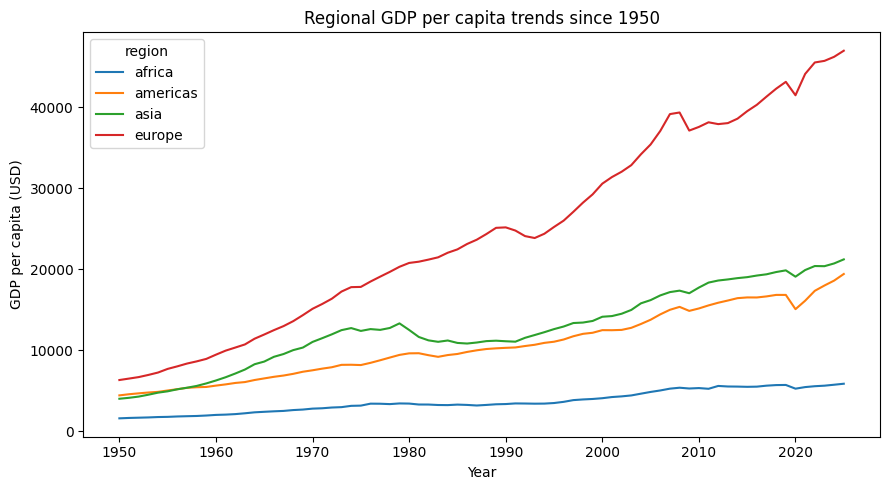

In [40]:
# plot baseline GDP trend per region since 1950
plt.figure(figsize=(9, 5))
sns.lineplot(data=regional, x="year", y="gdp", hue="region")
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel("Year")
plt.ylabel("GDP per capita (USD)")
plt.title("Regional GDP per capita trends since 1950")
plt.tight_layout()

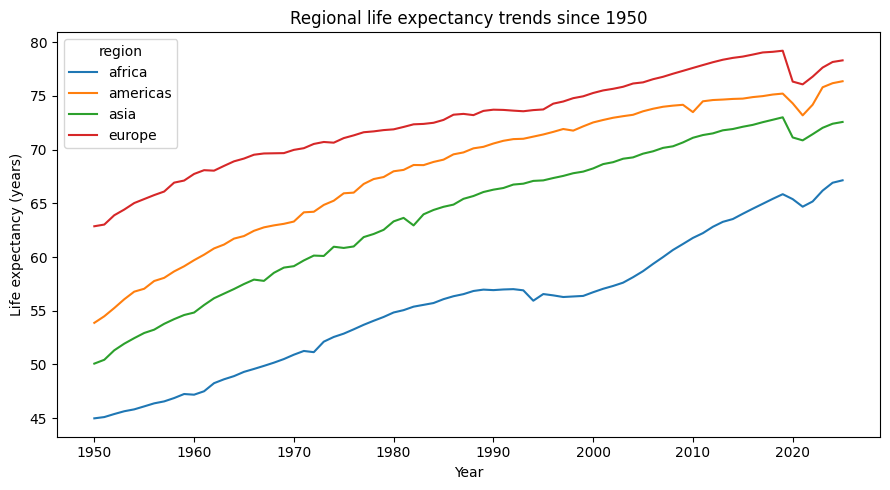

In [41]:
# plot baseline life expectancy trend per region since 1950
plt.figure(figsize=(9, 5))
sns.lineplot(data=regional, x="year", y="lex", hue="region")
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.title("Regional life expectancy trends since 1950")
plt.tight_layout()

In [48]:
# derive life expectancy per log GDP
regional["lex_per_log_gdp"] = regional["lex"] / np.log10(regional["gdp"])

# drop rows with invalid ratios (e.g., non-positive GDP)
regional = regional.replace([np.inf, -np.inf], np.nan).dropna(subset=["lex_per_log_gdp"])

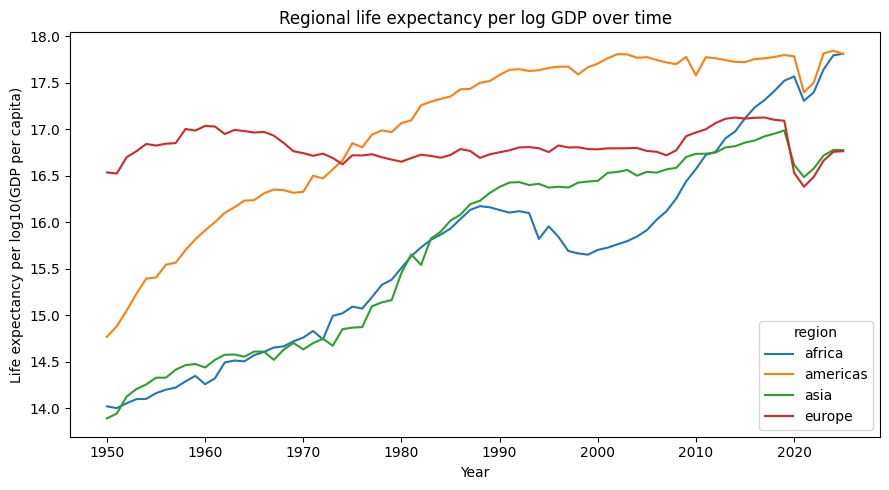

In [49]:
# plot the per-region trend with decade ticks
plt.figure(figsize=(9, 5))
sns.lineplot(data=regional, x="year", y="lex_per_log_gdp", hue="region")
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel("Year")
plt.ylabel("Life expectancy per log10(GDP per capita)")
plt.title("Regional life expectancy per log GDP over time")
plt.tight_layout()